# Подключаем библиотеки

In [1]:
import numpy as np
import scipy.stats as sts
from UltrametricMatrix import ultramatrix
from HierarchyClusteringWithoutLogs import hierarchy
from MinMaxHierarchy import MinMaxHierarchy
from MedianHierarchy import MedianHierarchy
from Linkages import single_linked
from Linkages import complete_linked
from Linkages import group_average_linked
from Linkages import weighted_average_linked
import pandas as pd
import seaborn as sns

Создаем словарик, в котором указываем каждому методу соответствующую функцию

In [2]:
Methods_N_Func = {
    'single_linked': single_linked,
    'complete_linked': complete_linked,
    'group_average_linked': group_average_linked,
    'weighted_average_linked': weighted_average_linked,
    'min_max_linked': MinMaxHierarchy,
    'median_linked': MedianHierarchy
}

# Описание функций

Функция `pipe(points, method)` считает метрики исходя из заданных кластеров и методов

In [3]:
def pipe(points, method):
    if method.__name__ == 'MinMaxHierarchy':
        logs = MinMaxHierarchy(points, metric='euclidean')
    elif method.__name__ == 'MedianHierarchy':
        logs = MedianHierarchy(points, metric='euclidean')
    else:
        logs = hierarchy(points, metric='euclidean', method=method)
    
    start_matrix = logs[1]
    finish_matrix = ultramatrix(logs[0], logs[2])

    max_abs = np.max(np.abs(start_matrix - finish_matrix))

    n_points = len(start_matrix) 
    N_edge = n_points * (n_points - 1) / 2
    norm_sum_abs = np.sum(np.abs(finish_matrix - start_matrix)) / N_edge

    return max_abs, norm_sum_abs

Функция `get_gen_sample(size)` генерирует кластеры

In [4]:
def get_gen_sample(size):
    N = int(size / 3)

    norm1 = sts.norm(1, 0.2)
    norm2 = sts.norm(1.5, 0.1)
    norm3 = sts.norm(2, 0.2)

    x = np.append(norm1.rvs(N), np.append(norm2.rvs(N), norm3.rvs(N), axis=0), axis=0)
    y = np.append(norm1.rvs(N), np.append(norm2.rvs(N), norm3.rvs(N), axis=0), axis=0)

    points = list(zip(x, y))

    return np.array(points)

Функция `times_when_method_better(results, res_column)` создает матрицу, которая показывает соотношение количества раз, когда метрика по указанному в строке методу оказалась меньше, чем метрика по указанному в столбце методу, к общему количеству экспериментов

In [5]:
def times_when_method_better(results):

    ResultsMatrix = pd.DataFrame(columns=results.columns, index=results.columns)

    for col in results.columns:
        for ind in results.columns:
            res = results[results[ind] < results[col]].shape[0] / results.shape[0]
            ResultsMatrix[col][ind] = res

    return ResultsMatrix.astype(float)

# Основаной скрипт

Основной скрипт, который запускает процесс генерации и посчета метрик

In [6]:
MetricsByMethodsForMax = {method_name: [] for method_name in Methods_N_Func.keys()}
MetricsByMethodsForSum = {method_name: [] for method_name in Methods_N_Func.keys()}


size = 1000
sample_size = 20
n_iter = 5
points = get_gen_sample(size)
ssamples = []

for _ in range(n_iter):
    indices = np.random.choice(points.shape[0], size=sample_size, replace=False)
    sample = points[indices]
    ssamples.append(sample)

    for method_name, method_func in Methods_N_Func.items():
        metrics_both = pipe(sample, method_func)
        MetricsByMethodsForMax[method_name].append(metrics_both[0])
        MetricsByMethodsForSum[method_name].append(metrics_both[1])

ResultsForMax = pd.DataFrame(MetricsByMethodsForMax)
ResultsForSum = pd.DataFrame(MetricsByMethodsForSum)

VERSION 18
Distance matrix: 0 step
          0         1         2         3         4         5         6   \
0   0.000000  0.621155  0.831731  0.336096  0.853582  0.207779  0.225901   
1   0.621155  0.000000  1.403818  0.315709  1.461742  0.788744  0.790154   
2   0.831731  1.403818  0.000000  1.088158  0.217782  0.629373  0.620647   
3   0.336096  0.315709  1.088158  0.000000  1.151302  0.478326  0.477256   
4   0.853582  1.461742  0.217782  1.151302  0.000000  0.673335  0.674525   
5   0.207779  0.788744  0.629373  0.478326  0.673335  0.000000  0.030564   
6   0.225901  0.790154  0.620647  0.477256  0.674525  0.030564  0.000000   
7   0.102451  0.715591  0.777156  0.437875  0.777890  0.190934  0.218486   
8   0.882659  1.377334  0.271704  1.068174  0.489485  0.676647  0.656759   
9   0.373526  0.974206  0.462070  0.664513  0.487538  0.186189  0.190822   
10  0.225767  0.761338  0.644125  0.446596  0.708646  0.069442  0.044477   
11  0.731298  0.156627  1.537666  0.456124  1.582763 

# Подсчет результатов

In [7]:
ResultsForMax.head()

,single_linked,complete_linked,group_average_linked,weighted_average_linked,min_max_linked,median_linked
0,1.221396,1.221396,0.695102,0.678696,0.610698,0.744768
1,1.490720,1.490720,0.753672,0.787753,0.745360,0.767577
2,1.447733,1.447733,0.799938,0.735054,0.723867,0.810897
3,1.227480,1.227480,0.666076,0.732137,0.613740,0.640598
4,1.610670,1.672657,0.861907,0.848630,0.836329,0.899510


In [8]:
ResultsForSum.head()

,single_linked,complete_linked,group_average_linked,weighted_average_linked,min_max_linked,median_linked
0,0.715504,0.942402,0.434709,0.482740,0.466647,0.426293
1,0.948521,0.947534,0.519857,0.493777,0.498132,0.516586
2,0.884728,1.111934,0.475934,0.481943,0.486944,0.475235
3,0.775946,0.959496,0.417835,0.423812,0.418589,0.416914
4,0.954270,1.140742,0.474948,0.524980,0.483355,0.473472


# Матрица сравнения результатов

<AxesSubplot: >

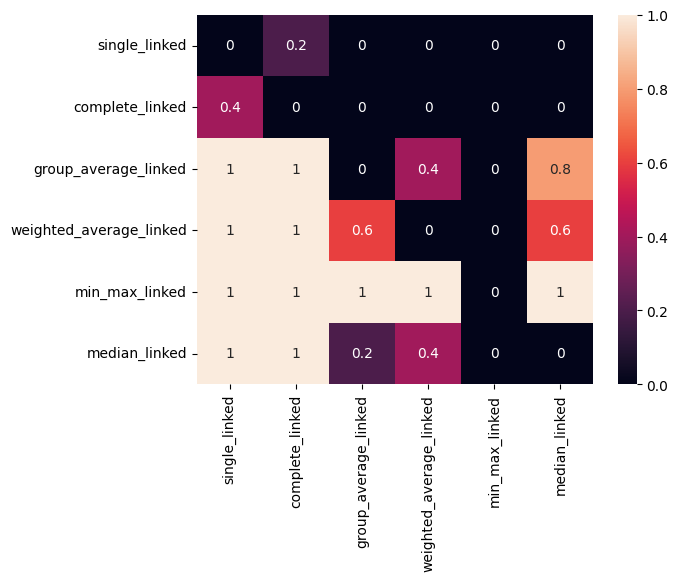

In [9]:
sns.heatmap(times_when_method_better(ResultsForMax), annot=True)

<AxesSubplot: >

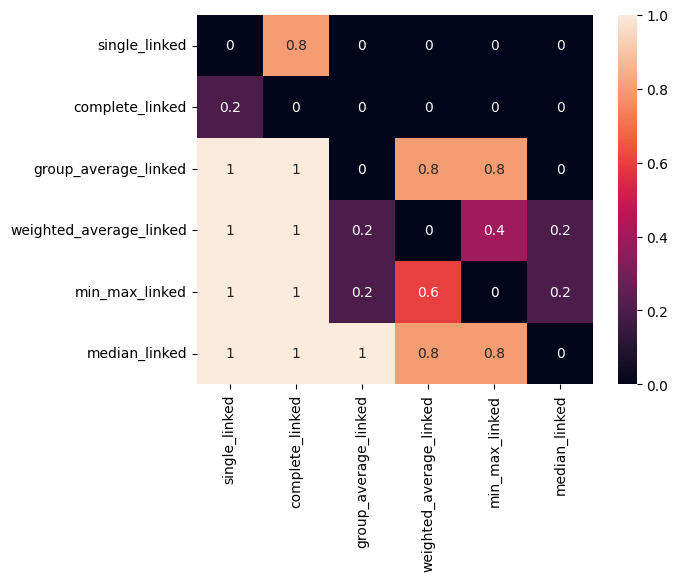

In [10]:
sns.heatmap(times_when_method_better(ResultsForSum), annot=True)